In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [92]:
class Model(nn.Module):
    def __init__(self,in_features=4, h1=8, h2=9,out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)

        return x

In [93]:
torch.manual_seed(41)
model=Model()

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [95]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df=pd.read_csv(url)

In [96]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [97]:
df['species']=df['species'].replace('setosa',0.0)
df['species']=df['species'].replace('versicolor',1.0)
df['species']=df['species'].replace('virginica',2.0)


/var/folders/vy/fch6w1_x1l75t7_9zqnljtt80000gn/T/ipykernel_21093/778736900.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species']=df['species'].replace('virginica',2.0)


In [98]:
df[df['species'] == 1]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
55,5.7,2.8,4.5,1.3,1.0
56,6.3,3.3,4.7,1.6,1.0
57,4.9,2.4,3.3,1.0,1.0
58,6.6,2.9,4.6,1.3,1.0
59,5.2,2.7,3.9,1.4,1.0


In [99]:
X=df.drop('species',axis=1)

In [100]:
X=X.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [101]:
y=df['species']
y=y.values
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)


In [103]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [104]:
y_train = torch.LongTensor(y_train)
y_test  = torch.LongTensor(y_test)


In [105]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [106]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [108]:
epochs=100
losses=[]
for epoch in range(epochs):
    optimizer.zero_grad()          # 1️⃣ reset gradients

    y_pred = model.forward(X_train)        # 2️⃣ correct forward call
    loss = criterion(y_pred, y_train)

    loss.backward()                # 3️⃣ backprop
    optimizer.step()               # 4️⃣ update weights

    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

Epoch 0 | Loss: 0.0529
Epoch 10 | Loss: 0.0451
Epoch 20 | Loss: 0.0398
Epoch 30 | Loss: 0.0360
Epoch 40 | Loss: 0.0329
Epoch 50 | Loss: 0.0304
Epoch 60 | Loss: 0.0268
Epoch 70 | Loss: 0.0234
Epoch 80 | Loss: 0.0205
Epoch 90 | Loss: 0.0185


Text(0.5, 0, 'epochs')

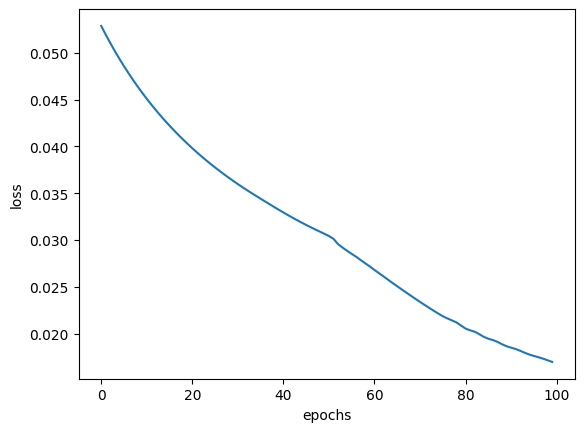

In [110]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epochs')

In [111]:
param.grad

NameError: name 'param' is not defined